# Genre Pre-Processing

In [ ]:
import re
import pandas as pd
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/movieplots.csv"
df = pd.read_csv(path)
df

,Title,Plots,Genre
0,il giorno prima,this story takes place when they experience th...,horror-thrill
1,the ghost inside,the ghost inside tells the story of a young mo...,horror-thrill
2,gigantor,the series is set in the year 2000. the show f...,horror-thrill
3,kimmy dora and the temple of kiyeme,kimmy and dora are identical twins with diffe...,horror-thrill
4,achamundu achamundu,senthil kumar ([[prasanna and malini ([[sneha...,horror-thrill
...,...,...,...
46881,mirzapur,"after their plane crashes in alaska, six oil w...",drama
46882,lord of war,two upper-class teenage girls in suburban conn...,drama
46883,"lust, caution",a shocking incident at a wedding procession ig...,drama
46884,NaN,an arms dealer confronts the morality of his w...,drama


In [ ]:
df = pd.read_csv('movieplots.csv')
df

In [ ]:
print(df['Plots'][14])

nursery teacher jenny  and her boyfriend steve  escape for a romantic weekend at an idyllic remote lake. when they arrive at the beach, they attempt to enjoy a relaxing day by the lake, but they are harassed by a gang of teenage hooligans. steve stubbornly decides that he would stay at their campsite rather than give in to the gang. they endure a night of loud noise and catcalls from the gang. by the morning, jenny and steve discover that their food has been infested with insects. hungry, they return to the car and plan to drive to find someplace to eat, but their car gets a flat when they run over an empty bottle. steve replaces the tire and they set off for the town. while in town, steve sees the gang riding around on their bicycles. jenny and steve arrive at a diner for some breakfast. in the diner, steve asks the waitress if she has seen the kids riding around on bikes. the waitress jokingly asks if they have been terrorizing them. steve laughs and states they have only been "hassl

In [ ]:
genrecounts = df['Genre'].value_counts()
print(genrecounts)

Genre
drama                            8026
unknown                          6083
romance                          5720
comedy                           4398
thriller                         2636
                                 ... 
national film board docudrama       1
cult drama                          1
medical drama                       1
horror/sci-fi                       1
horror romantic comedy              1
Name: count, Length: 2249, dtype: int64


In [ ]:
df['Genre'] = df['Genre'].str.strip()
df['Genre'].unique()

array(['horror-thrill', 'horror', 'thriller', ...,
       'adventure, romance, fantasy film', 'ero',
       'horror romantic comedy'], dtype=object)

In [ ]:
# Drop rows with genre 'unknown'
df = df[df['Genre'] != 'unknown']

In [ ]:
count = df['Genre'].value_counts()
print(count)

Genre
drama                                            8026
romance                                          5720
comedy                                           4398
thriller                                         2636
action                                           2179
                                                 ... 
crime drama based on a true story                   1
drama based on the novel by stephen vizinczey       1
August 25                                           1
animation-drama                                     1
horror romantic comedy                              1
Name: count, Length: 2226, dtype: int64


In [ ]:
df.shape

(40803, 3)

In [ ]:
print(df['Genre'].unique())

['horror-thrill' 'horror' 'thriller' ...
 'adventure, romance, fantasy film' 'ero' 'horror romantic comedy']


In [ ]:
def map_genre(genre):
    if isinstance(genre, str):  # Check if genre is a string
        genre = genre.lower()
        if any(substring in genre for substring in ['drama', 'melodrama', 'docudrama', 'romantic drama', 'historical drama', 'comedy-drama', 'crime drama', 'war drama', 'action drama', 'sports drama', 'family drama', 'teen drama', 'political drama', 'legal drama', 'medical drama', 'anthology drama']):
            return 'drama'
        elif any(substring in genre for substring in ['action', 'action adventure', 'action comedy', 'action thriller', 'action drama', 'action horror', 'action mystery', 'action romance', 'action sci-fi', 'action spy', 'action war', 'action western']):
            return 'action'
        elif any(substring in genre for substring in ['romance', 'romantic comedy', 'romantic drama', 'romantic fantasy', 'romantic thriller']):
            return 'romance'
        elif any(substring in genre for substring in ['comedy', 'romantic comedy', 'comedy drama', 'comedy horror', 'comedy mystery', 'comedy thriller', 'action comedy', 'black comedy', 'sex comedy', 'slapstick comedy', 'stand-up comedy']):
            return 'comedy'
        elif any(substring in genre for substring in ['horror', 'horror comedy', 'horror drama', 'horror thriller', 'action horror', 'comedy horror', 'psychological horror', 'supernatural horror']):
            return 'horror'
        elif any(substring in genre for substring in ['thriller', 'action thriller', 'comedy thriller', 'crime thriller', 'horror thriller', 'psychological thriller', 'supernatural thriller']):
            return 'thriller'
        elif any(substring in genre for substring in ['anime', 'anime drama', 'anime fantasy', 'anime horror', 'anime mystery', 'anime romance', 'anime sci-fi']):
            return 'anime'
        elif any(substring in genre for substring in ['mystery', 'action mystery', 'comedy mystery', 'crime mystery', 'horror mystery', 'mystery thriller']):
            return 'mystery'
        elif any(substring in genre for substring in ['sci-fi', 'action sci-fi', 'anime sci-fi', 'comedy sci-fi', 'drama sci-fi', 'horror sci-fi', 'mystery sci-fi', 'romance sci-fi', 'sci-fi thriller']):
            return 'sci-fi'

    return genre  # Return the original genre if it's not a string or NaN

df['Genre'] = df['Genre'].apply(map_genre)


<ipython-input-20-188b9c3b099b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].apply(map_genre)


In [ ]:
print(df['Genre'].nunique())

581


In [ ]:
def map_genre(genre):
  if isinstance(genre, str):  # Check if genre is a string
    genre = genre.lower()
    if 'sci-fi' in genre or 'science fiction' in genre or 'sci-fi for children' in genre:
        return 'Sci-Fi'
    elif 'romantic comedy' in genre or 'rom-com' in genre or 'comedy / drama / romance' in genre or 'romantic comedy-drama' in genre or 'romance/comedy' in genre or 'comedy/romance' in genre:
        return 'Romantic Comedy'
    elif 'biopic' in genre or 'biography' in genre or 'biogtaphy' in genre or 'bio-pic, sports' in genre or 'bio-pic, drama, music' in genre or 'biographical, documentary' in genre or 'biographical, drama' in genre or 'biography / drama / romance' in genre or 'biography crime' in genre or 'biographical war film' in genre:
        return 'Biography'
    elif 'animation' in genre or 'anime' in genre or 'cartoon' in genre or 'animation adventure' in genre or 'animation comedy' in genre or 'animation fantasy' in genre or 'animated adventure' in genre or 'animation, adventure, sci-fi' in genre or 'animation, comedy, action' in genre or 'animation, live action / drama / comedy' in genre or 'animation / adventure' in genre or 'animation martial arts action-comedy' in genre or 'animation musical' in genre:
        return 'Animation'
    elif 'horror' in genre or 'horror-thrill' in genre or 'horror-thriller' in genre or 'horror / mystery / thriller' in genre or 'horror, thriller, drama' in genre or 'horror, sci-fi, drama' in genre or 'horror comedy, parody' in genre:
        return 'Horror'
    else:
        return genre  # return the original genre if no match is found

df['Genre'] = df['Genre'].apply(map_genre)

<ipython-input-23-08969431201b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].apply(map_genre)


In [ ]:
print(df['Genre'].nunique())

493


In [ ]:
print(df['Genre'].unique())

['Horror' 'thriller' 'scifi' 'action' 'romance' 'western' 'comedy' 'short'
 'short film' 'biographical' 'drama' 'adventure' 'short fantasy'
 'silent sports' 'crime' 'fantasy' 'adventure serial' 'epic' 'historical'
 'Biography' 'mystery' 'sexual hygiene/exploitation film' 'spy'
 'propaganda' 'ww1 propaganda' 'animated series' 'swashbuckler'
 'documentary' 'fantasy, family' 'war' 'fantasy, adventure'
 'american football' 'semi-staged documentary' 'race film' 'musical'
 'operetta' 'detective' 'film noir' 'sports' 'adventure film' 'romantic'
 'Animation' 'Sci-Fi' 'animated' 'adventure, fantasy' 'western, musical'
 'western, war' 'exploitation' 'musical western' 'serial'
 'animated, musical' 'adventure, music' 'crime, film noir' 'suspense'
 'gangster' 'biblical' 'bio-pic' 'musical fantasy' 'war spy'
 'animated short' 'western musical' 'western serial' 'family' 'race'
 'charlie chan' 'aviation' 'crime musical' 'spy serial' 'war documentary'
 'propaganda short' 'propaganda short animated shor

In [ ]:
def map_genre(genre):
  if isinstance(genre, str):  # Check if genre is a string
    genre = genre.lower()
    if 'horror' in genre:
        return 'Horror'
    elif 'thriller' in genre or 'suspense' in genre or 'neo-noir' in genre or 'spy' in genre or 'espionage' in genre or 'spy film' in genre or 'spy serial' in genre or 'spy anthology' in genre or 'spy spoof' in genre:
        return 'Thriller'
    elif 'scifi' in genre or 'science-fiction' in genre or 'Sci-Fi' in genre:
        return 'Sci-Fi'
    elif 'action' in genre or 'adventures' in genre or 'outlaw biker film' in genre or 'biker film' in genre or 'disaster film' in genre or 'martial arts' in genre or 'disaster' in genre:
        return 'Action'
    elif 'romance' in genre or 'romantic' in genre or 'romantic musical' in genre:
        return 'Romance'
    elif 'western' in genre or 'western, musical' in genre or 'western, war' in genre or 'western musical' in genre or 'western serial' in genre or 'western, serial' in genre or 'western, film noir' in genre or 'western, 3-d' in genre or 'musical, western' in genre or 'war, western' in genre:
        return 'Western'
    elif 'comedy' in genre or 'rom com' in genre or 'spy spoof' in genre or 'mockumentary' in genre:
        return 'Comedy'
    elif 'short' in genre or 'short film' in genre or 'short fantasy' in genre or 'short subject' in genre:
        return 'Short'
    elif 'biographical' in genre or 'biography' in genre or 'bio-pic' in genre or 'musical bio-pic' in genre:
        return 'Biography'
    elif 'drama' in genre:
        return 'Drama'
    elif 'adventure' in genre or 'adventures' in genre or 'adventure serial' in genre or 'adventure film' in genre or 'adventure, fantasy' in genre or 'adventure, music' in genre or 'adventure, serial' in genre:
        return 'Adventure'
    elif 'fantasy' in genre or 'short fantasy' in genre or 'fantasy, family' in genre or 'fantasy, adventure' in genre or 'musical fantasy' in genre or 'animated, fantasy':
        return 'Fantasy'
    elif 'crime' in genre or 'true crime' in genre or 'crime musical' in genre or 'crime, adventure' in genre or 'crime, film noir' in genre or 'crime, western' in genre or 'gangster':
        return 'Crime'
    elif 'documentary' in genre or 'semi-staged documentary' in genre or 'propaganda short' in genre or 'propaganda short animated short' in genre or 'compilation' in genre or 'experimental short' in genre or 'propaganda' in genre or 'ww1 propaganda' in genre or 'war documentary' in genre or 'sexual hygiene/exploitation film' in genre or 'exploitation' in genre or 'sexploitation' in genre or 'adult' in genre or 'adult film' in genre or 'erotic musical':
        return 'Documentary'
    elif 'family' in genre or 'fantasy, family' in genre or 'family, western' in genre or 'musical, family' in genre or 'animated, family':
        return 'Family'
    elif 'musical' in genre or 'operetta' in genre or 'musical western' in genre or 'animated, musical' in genre or 'musical fantasy' in genre or 'war short' in genre or 'animated musical' in genre or 'musical, fantasy' in genre or 'musical, family' in genre or 'musical, western' in genre or 'erotic musical':
        return 'Musical'
    elif 'war' in genre or 'war spy' in genre or 'war documentary' in genre or 'war propaganda' in genre or 'war, satire' in genre or 'war, western' in genre or 'war, biker':
        return 'War'
    elif 'epic' in genre or 'historic' in genre or 'historical' in genre or 'historical epic' in genre or 'paramount. biblical epic':
        return 'History'
    elif 'silent sports' in genre or 'sports' in genre or 'american football':
        return 'Sport'
    elif 'animation' in genre or 'animated series' in genre or 'Animation' in genre or 'animated' in genre or 'animated, musical' in genre or 'animated short' in genre or 'animated film' in genre or 'animated, war' in genre or 'animated, adult':
        return 'Animation'
    elif 'mystery' in genre or 'detective' in genre or 'charlie chan':
        return 'Mystery'
    else:
        return genre

df['Genre'] = df['Genre'].apply(map_genre)

<ipython-input-27-ea6fa2826adf>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].apply(map_genre)


In [ ]:
print(df['Genre'].nunique())

12


In [ ]:
print(df['Genre'].unique())

['Horror' 'Thriller' 'Sci-Fi' 'Action' 'Romance' 'Western' 'Comedy'
 'Short' 'Biography' 'Drama' 'Adventure' 'Fantasy' None]


In [ ]:
df.shape

(40803, 3)

In [ ]:
print(df['Genre'].value_counts())

Genre
Drama        11510
Romance       6632
Comedy        5563
Fantasy       5001
Action        3210
Thriller      3076
Horror        2860
Sci-Fi         973
Western        888
Adventure      594
Biography      295
Short          173
Name: count, dtype: int64


# Plots Preprocessing

 **Droping null values**

In [ ]:
print(df.isnull().sum())

Title     6
Plots    11
Genre    28
dtype: int64


In [ ]:
df = df.dropna(subset=['Plots'])
df = df.dropna(subset=['Genre'])
print(df.isnull().sum())

Title    6
Plots    0
Genre    0
dtype: int64


**REMOVING SPECIAL CHARACTERS**

In [ ]:
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Plots'] = df['Plots'].apply(remove_special_characters)

<ipython-input-18-1a39a74b1377>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plots'] = df['Plots'].apply(remove_special_characters)


**CONVERSION TO LOWER CASE**

In [ ]:
def convert_to_lowercase(text):
    return text.lower()

df['Plots'] = df['Plots'].apply(convert_to_lowercase)

<ipython-input-19-2ab3aba6be92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plots'] = df['Plots'].apply(convert_to_lowercase)


In [ ]:
df.shape

(40764, 3)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**REMOVING STOP WORDS (AS AN EXPERIMENT AS IN I MIGHT OR MIGHT NOT RUN THIS DEPENDING ON THE PERPOMANCE OF THE CODE)**

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['Plots'] = df['Plots'].apply(remove_stopwords)


In [ ]:
df

,Title,Plots,Genre
0,il giorno prima,this story takes place when they experience th...,Horror
1,the ghost inside,the ghost inside tells the story of a young mo...,Horror
2,gigantor,the series is set in the year 2000. the show f...,Horror
3,kimmy dora and the temple of kiyeme,kimmy and dora are identical twins with diffe...,Horror
4,achamundu achamundu,senthil kumar ([[prasanna and malini ([[sneha...,Horror
...,...,...,...
46881,mirzapur,"after their plane crashes in alaska, six oil w...",Drama
46882,lord of war,two upper-class teenage girls in suburban conn...,Drama
46883,"lust, caution",a shocking incident at a wedding procession ig...,Drama
46884,NaN,an arms dealer confronts the morality of his w...,Drama


**TOKENIZATION**

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'tagger', 'ner'])

def get_tokens(doc_text):
    skip_pattern = '\r\n \n\n \n\n\n!"-#$%&()--.*+,-./:;<=>?@[\\]^_`{|}~\t\n\r '
    tokens = [token.text.lower() for token in nlp(doc_text) if token.text not in skip_pattern]
    return tokens
df['tokens'] = df['Plots'].apply(get_tokens)

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
df

,Title,Plots,Genre,tokens
0,il giorno prima,this story takes place when they experience th...,Horror,"[this, story, takes, place, when, they, experi..."
1,the ghost inside,the ghost inside tells the story of a young mo...,Horror,"[the, ghost, inside, tells, the, story, of, a,..."
2,gigantor,the series is set in the year 2000 the show fo...,Horror,"[the, series, is, set, in, the, year, 2000, th..."
3,kimmy dora and the temple of kiyeme,kimmy and dora are identical twins with diffe...,Horror,"[kimmy, and, dora, are, identical, twins, with..."
4,achamundu achamundu,senthil kumar prasanna and malini sneha are ...,Horror,"[senthil, kumar, prasanna, and, malini, sneha,..."
...,...,...,...,...
46881,mirzapur,after their plane crashes in alaska six oil wo...,Drama,"[after, their, plane, crashes, in, alaska, six..."
46882,lord of war,two upperclass teenage girls in suburban conne...,Drama,"[two, upperclass, teenage, girls, in, suburban..."
46883,"lust, caution",a shocking incident at a wedding procession ig...,Drama,"[a, shocking, incident, at, a, wedding, proces..."
46884,NaN,an arms dealer confronts the morality of his w...,Drama,"[an, arms, dealer, confronts, the, morality, o..."


**Sequence Creation:**

In [ ]:
#this is explicitly present in model now so dont run rn
train_len = 25 + 1  # 25 words input, 1 word output

text_sequences = df['Plots'].tolist()

for i in range(train_len, len(df['tokens'])):
    seq = df['tokens'][i - train_len: i]
    text_sequences.append(seq)


**Vectorization**

In [ ]:
#this is explicitly present in model now so dont run rn
# Convert the 'tokens' column to a list of lists
tokens = df['tokens'].tolist()

# Define the length of your sequences
train_len = 25 + 1  # 25 words input, 1 word output

text_sequences = []

# Create the sequences
for i in range(train_len, len(tokens)):
    seq = tokens[i - train_len: i]
    text_sequences.append(seq)

# Flatten the list of tokens and convert it into a string
text_sequences = [' '.join(token) for sublist in text_sequences for token in sublist]

# Now you can fit the tokenizer on the text sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)


**RARE WORDS** **(THIS TOO WILL BE RUN ON TRIAL BASIS)**

In [ ]:
from collections import Counter

all_words = ' '.join(df['Plots']).split()

word_counts = Counter(all_words)

threshold = 5  # Adjust this value based on your dataset and requirements

rare_words = [word for word, count in word_counts.items() if count <= threshold]

def handle_rare_words(text, rare_words, replacement='<UNK>'):
    tokens = text.split()
    filtered_tokens = [token if token not in rare_words else replacement for token in tokens]
    return ' '.join(filtered_tokens)

df['Plots'] = df['Plots'].apply(lambda x: handle_rare_words(x, rare_words))

In [ ]:
df

,Title,Plots,Genre
0,travelling salesman,four mathematicians gathered meet top official...,Horror
1,205 – room of fear,19yearold student katrin thrilled last far ove...,Horror
2,sherlock holmes and the voice of terror,film begins title card describing holmes watso...,Horror
3,state of play,one night thief fleeing georgetown washington ...,Horror
4,banzai runner,yearly everymanforhimself car race staged dese...,Horror
...,...,...,...
52249,mirzapur,plane crashes alaska six oil workers led skill...,Drama
52250,lord of war,two upperclass teenage girls suburban connecti...,Drama
52251,"lust, caution",shocking incident wedding procession ignites s...,Drama
52252,NaN,arms dealer confronts morality work chased int...,Drama


No charts were generated by quickchart


In [ ]:
path = "/content/drive/My Drive/Plot.csv"
df = pd.read_csv(path)
df

,Title,Plots,Genre
0,il giorno prima,this story takes place when they experience th...,Horror
1,the ghost inside,the ghost inside tells the story of a young mo...,Horror
2,gigantor,the series is set in the year 2000. the show f...,Horror
3,kimmy dora and the temple of kiyeme,kimmy and dora are identical twins with diffe...,Horror
4,achamundu achamundu,senthil kumar ([[prasanna and malini ([[sneha...,Horror
...,...,...,...
40759,mirzapur,"after their plane crashes in alaska, six oil w...",Drama
40760,lord of war,two upper-class teenage girls in suburban conn...,Drama
40761,"lust, caution",a shocking incident at a wedding procession ig...,Drama
40762,NaN,an arms dealer confronts the morality of his w...,Drama


In [ ]:
df.to_csv('Plot.csv', index=False)

# **VISUALISATION**

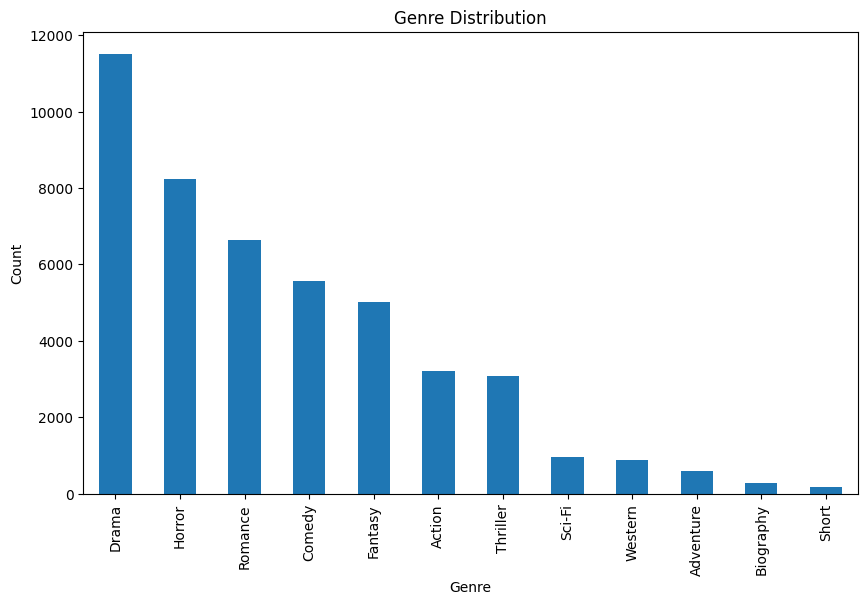

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

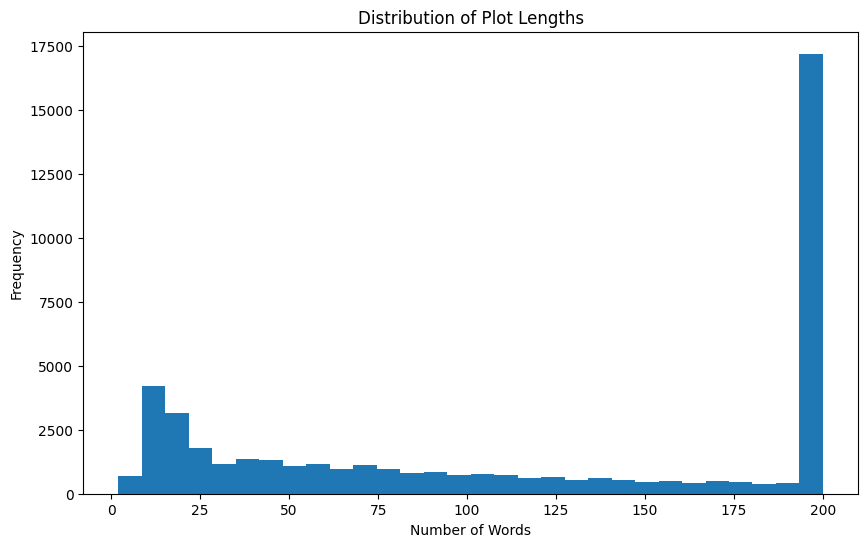

In [ ]:
plt.figure(figsize=(10, 6))
df['Plots'].apply(lambda x: len(x.split())).plot(kind='hist', bins=30)
plt.title('Distribution of Plot Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

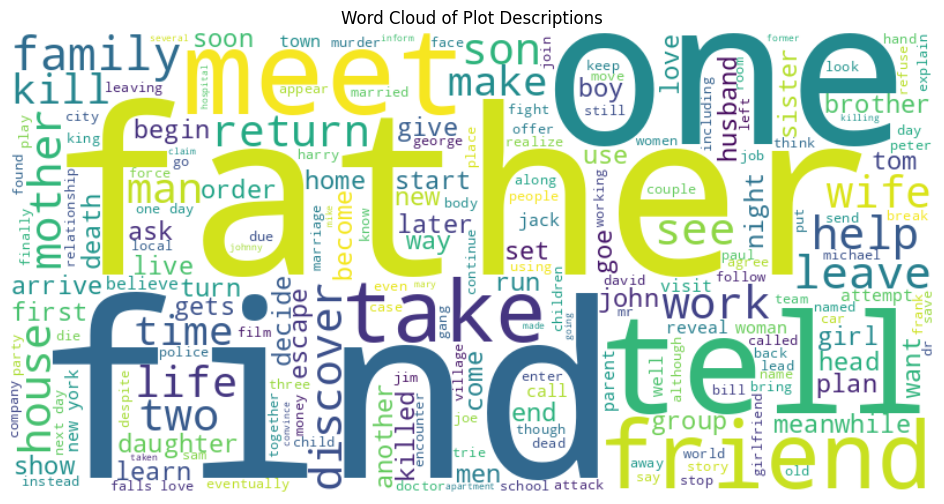

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Plots']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Plot Descriptions')
plt.axis('off')
plt.show()

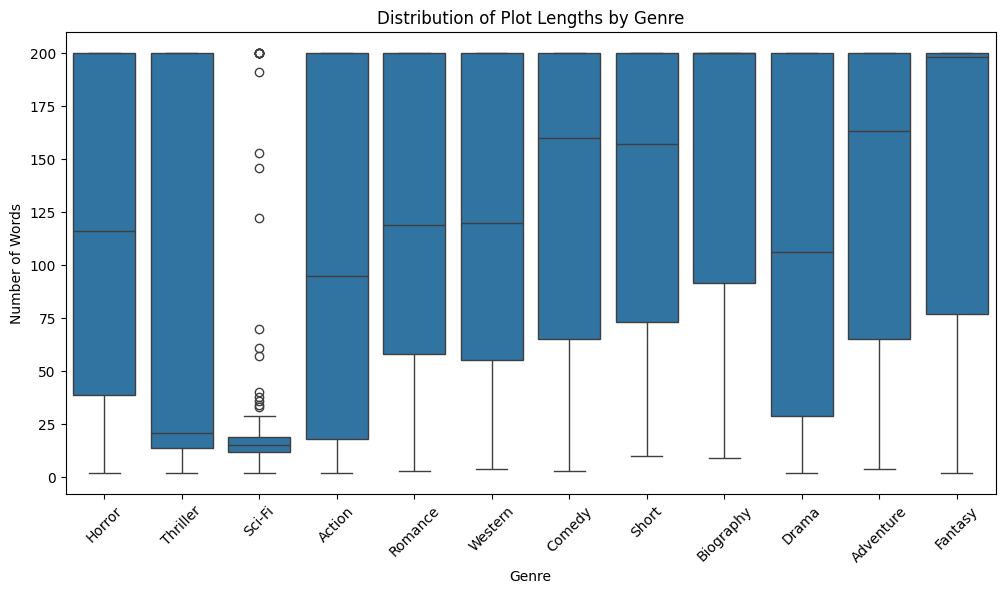

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
df['word_count'] = df['Plots'].apply(lambda x: len(x.split()))
sns.boxplot(x='Genre', y='word_count', data=df)
plt.title('Distribution of Plot Lengths by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.show()

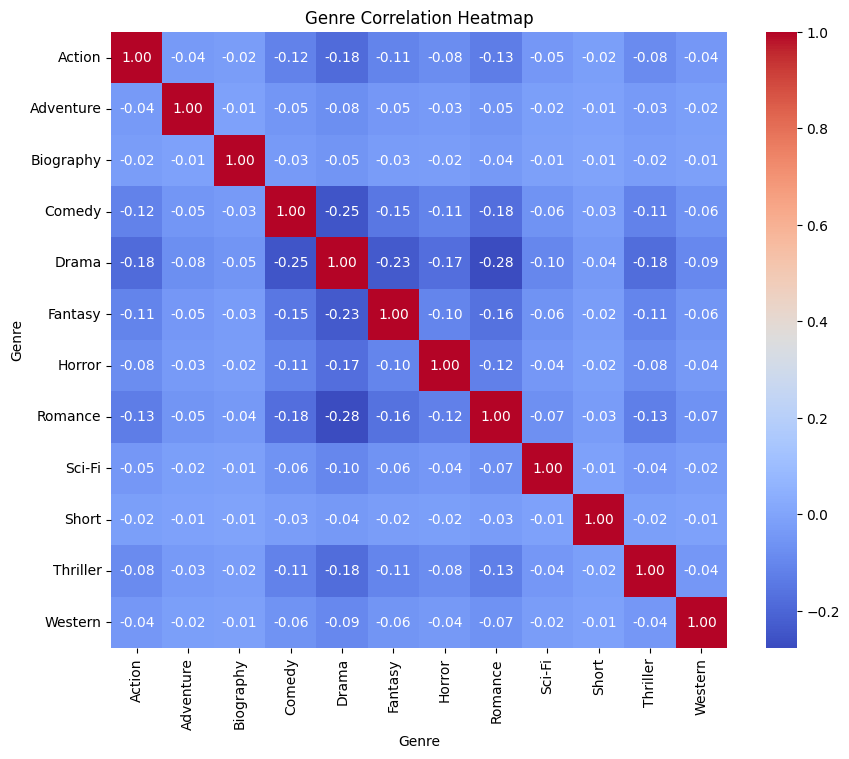

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

binary_matrix = pd.get_dummies(df['Genre'])
correlation_matrix = binary_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Genre Correlation Heatmap')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

In [ ]:
df

,Title,Plots,Genre,word_count
0,travelling salesman,four mathematicians gathered meet top official...,Horror,48
1,205 – room of fear,19yearold student katrin thrilled last far ove...,Horror,36
2,sherlock holmes and the voice of terror,film begins title card describing holmes watso...,Horror,200
3,state of play,one night thief fleeing georgetown washington ...,Horror,200
4,banzai runner,yearly everymanforhimself car race staged dese...,Horror,31
...,...,...,...,...
52249,mirzapur,plane crashes alaska six oil workers led skill...,Drama,16
52250,lord of war,two upperclass teenage girls suburban connecti...,Drama,19
52251,"lust, caution",shocking incident wedding procession ignites s...,Drama,14
52252,NaN,arms dealer confronts morality work chased int...,Drama,8


# **MODEL FITTING**

# RNN

In [ ]:
import spacy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense
from keras.utils import to_categorical

# Convert the 'tokens' column to a list of lists
tokens = df['tokens'].tolist()[:1000]  # Use only the first 1,000 plots
# Define the length of your sequences
train_len = 25 + 1  # 25 words input, 1 word output

text_sequences = []

# Create the sequences
for i in range(train_len, len(tokens)):
    seq = tokens[i - train_len: i]
    text_sequences.append(seq)

# Flatten the list of tokens and convert it into a string
text_sequences = [' '.join(token) for sublist in text_sequences for token in sublist]

# Now you can fit the tokenizer on the text sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

# Vocabulary size
vocabulary_size = len(tokenizer.word_index) + 1

# Padding
sequences = pad_sequences(sequences, maxlen=train_len, truncating='pre')

# Split sequences into input (X) and output (y)
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocabulary_size)

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=100, input_length=train_len-1))
model.add(SimpleRNN(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64))
model.add(Dropout(0.2))
model.add(Dense(vocabulary_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           1651000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 25, 256)           91392     
                                                                 
 dropout (Dropout)           (None, 25, 256)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 25, 128)           49280     
                                                                 
 dropout_1 (Dropout)         (None, 25, 128)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
# Train the model
model.fit(X, y, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
198/198 [==============================] - 44s 193ms/step - loss: 6.9821 - accuracy: 0.0205
Epoch 2/10
198/198 [==============================] - 35s 177ms/step - loss: 6.4072 - accuracy: 0.0208
Epoch 3/10
198/198 [==============================] - 37s 189ms/step - loss: 6.3940 - accuracy: 0.0208
Epoch 4/10
198/198 [==============================] - 35s 179ms/step - loss: 6.3911 - accuracy: 0.0208
Epoch 5/10
198/198 [==============================] - 38s 191ms/step - loss: 6.3895 - accuracy: 0.0208
Epoch 6/10
198/198 [==============================] - 37s 185ms/step - loss: 6.3883 - accuracy: 0.0208
Epoch 7/10
198/198 [==============================] - 36s 184ms/step - loss: 6.3876 - accuracy: 0.0208
Epoch 8/10
198/198 [==============================] - 37s 185ms/step - loss: 6.8486 - accuracy: 0.0198
Epoch 9/10
198/198 [==============================] - 40s 200ms/step - loss: 6.5132 - accuracy: 0.0224
Epoch 10/10
198/198 [==============================] - 35s 178ms/step - l

In [ ]:
def generate_text(key_words, next_words, max_sequence_len):
    seed_text = ' '.join(key_words)
    generated_text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs) + 1
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
        generated_text += " " + output_word
    return generated_text

new_plot = ["mystery", "haunted", "dark", "fear"]
generated_text = generate_text(new_plot, 20, train_len)
print(generated_text)

mystery haunted dark fear she she she she she she she she she she she she she she she she she she she she


In [ ]:
import numpy as np

# Function to generate text based on genre
def generate_plot(genre, next_words, max_sequence_len):
    # Include genre in the seed text
    seed_text = genre.lower()
    generated_text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs) + 1
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
        generated_text += " " + output_word
    return generated_text

# Example usage
genre = "drama"
generated_plot = generate_plot(genre, 20, train_len)
print(generated_plot)

drama up up up up up up up up up up up up up up up up up up up up


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", accuracy)

159/159 [==============================] - 4s 20ms/step - loss: 6.2911 - accuracy: 0.1579
Test Accuracy: 0.15794670209288597


# LSTM(WITH SOME CUSTOMISATION)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokens = df['tokens'].tolist()[:10000]  # Use only the first 1,000 plots
train_len = 25 + 1
text_sequences = []
for i in range(train_len, len(tokens)):
    seq = tokens[i - train_len: i]
    text_sequences.append(seq)

text_sequences = [' '.join(map(str, seq)) for seq in text_sequences]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

vocabulary_size = len(tokenizer.word_index) + 1

sequences = pad_sequences(sequences, maxlen=train_len, truncating='pre')

X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocabulary_size)

# Model creation
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=train_len-1, input_length=train_len-1))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=vocabulary_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
model.fit(X, y, batch_size=128, epochs=80)


Epoch 1/80
78/78 [==============================] - 32s 289ms/step - loss: 9.6486 - accuracy: 0.0146
Epoch 2/80
78/78 [==============================] - 19s 250ms/step - loss: 7.7835 - accuracy: 0.0158
Epoch 3/80
78/78 [==============================] - 21s 264ms/step - loss: 7.5848 - accuracy: 0.0160
Epoch 4/80
78/78 [==============================] - 20s 256ms/step - loss: 7.5267 - accuracy: 0.0165
Epoch 5/80
78/78 [==============================] - 19s 247ms/step - loss: 7.4962 - accuracy: 0.0165
Epoch 6/80
78/78 [==============================] - 21s 266ms/step - loss: 7.4515 - accuracy: 0.0158
Epoch 7/80
78/78 [==============================] - 20s 257ms/step - loss: 7.3781 - accuracy: 0.0158
Epoch 8/80
78/78 [==============================] - 19s 250ms/step - loss: 7.2909 - accuracy: 0.0165
Epoch 9/80
78/78 [==============================] - 20s 263ms/step - loss: 7.1941 - accuracy: 0.0143
Epoch 10/80
78/78 [==============================] - 23s 296ms/step - loss: 7.0912 - accura

In [ ]:
import numpy as np

def generate_plot(model, tokenizer, seq_len, seed_text, num_gen_words):
    output_text = []
    input_text = seed_text
    for _ in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        # padding matching input length check
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len-1, truncating='pre')
        pred_word_ind = np.argmax(model.predict(pad_encoded), axis=-1)[0]
        pred_word = tokenizer.index_word.get(pred_word_ind, '')
        input_text += ' ' + pred_word
        output_text.append(pred_word)
    return ' '.join(output_text)


In [ ]:
start = "a dark mysterious figure lurking through the"
no = 100

seq_len = 25

newplot = generate_plot(model, tokenizer, seq_len,start,no)

print(newplot)

a dark mysterious figure lurking through the dark woods was seen by leslie and it has been following here ever since the only way to get rid of it is to kill it with its own teeth


# CUSTOM EMBEDINGS

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

seq_len = 50
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'].tolist()[:10000])
sequences = tokenizer.texts_to_sequences(df['tokens'].tolist()[:10000])

# Padding
sequences = pad_sequences(sequences, maxlen=seq_len, padding='pre')

# Split sequences into input (X) and output (y)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

def create_lstm_model(seq_len, vocabulary_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocabulary_size, output_dim=100, input_length=seq_len-1))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128))
    model.add(Dropout(0.2))
    model.add(Dense(units=vocabulary_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

vocabulary_size = len(tokenizer.word_index) + 1
model = create_lstm_model(seq_len, vocabulary_size)

model.fit(X_train, y_train, batch_size=128, epochs=70, validation_data=(X_test, y_test))

def generate_plot(model, tokenizer, seq_len, seed_text, num_gen_words):
    output_text = seed_text
    for _ in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([output_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len-1, truncating='pre')
        pred_word_ind = np.argmax(model.predict(pad_encoded), axis=-1)[0]
        pred_word = tokenizer.index_word.get(pred_word_ind, '')
        if not pred_word:
            break  # Stop if the predicted word is empty or unknown
        output_text += ' ' + pred_word
    return output_text


# Generate a new plot
seed_text = "A dark mysterious figure lurking"
num_gen_words = 100
new_plot = generate_plot(model, tokenizer, seq_len, seed_text, num_gen_words)
print(new_plot)


Epoch 1/70
71/71 [==============================] - 74s 930ms/step - loss: 9.5860 - accuracy: 0.0167 - val_loss: 8.7587 - val_accuracy: 0.0090
Epoch 2/70
71/71 [==============================] - 53s 744ms/step - loss: 7.9830 - accuracy: 0.0169 - val_loss: 8.7236 - val_accuracy: 0.0090
Epoch 3/70
71/71 [==============================] - 56s 787ms/step - loss: 7.7262 - accuracy: 0.0161 - val_loss: 8.6928 - val_accuracy: 0.0090
Epoch 4/70
71/71 [==============================] - 59s 830ms/step - loss: 7.5976 - accuracy: 0.0176 - val_loss: 8.7102 - val_accuracy: 0.0090
Epoch 5/70
71/71 [==============================] - 56s 798ms/step - loss: 7.5428 - accuracy: 0.0162 - val_loss: 8.7334 - val_accuracy: 0.0090
Epoch 6/70
71/71 [==============================] - 55s 764ms/step - loss: 7.5210 - accuracy: 0.0171 - val_loss: 8.8221 - val_accuracy: 0.0090
Epoch 7/70
71/71 [==============================] - 57s 805ms/step - loss: 7.4948 - accuracy: 0.0176 - val_loss: 8.7311 - val_accuracy: 0.0090

In [ ]:
print(df['tokens'][:10000])

0       [this, story, takes, place, when, they, experi...
1       [the, ghost, inside, tells, the, story, of, a,...
2       [the, series, is, set, in, the, year, 2000, th...
3       [kimmy, and, dora, are, identical, twins, with...
4       [senthil, kumar, prasanna, and, malini, sneha,...
                              ...                        
9995    [a, telephone, operator, is, walking, out, wit...
9996    [a, young, man, henry, b., walthall, falls, in...
9997    [frank, andrews, donald, crisp, is, a, well, t...
9998    [wealthy, edwin, peter, brewster, disowns, his...
9999    [in, a, busy, day, a, wife, played, by, an, en...
Name: tokens, Length: 10000, dtype: object


In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

seq_len = 50

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'][:10000])

sequences = tokenizer.texts_to_sequences(df['tokens'][:10000])

sequences = pad_sequences(sequences, maxlen=seq_len, padding='pre')

X = sequences[:, :-1]  # All tokens except the last as input
y = sequences[:, -1]   # The last token as the target output

# One-hot encoding the output
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Take a random subset of 5000 entries for both X and y
np.random.seed(42)
subset_indices = np.random.choice(len(X), 5000, replace=False)
X_subset = X[subset_indices]
y_subset = y[subset_indices]

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.1, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=seq_len-1))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=len(tokenizer.word_index) + 1, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the subset
model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))



Epoch 1/100
36/36 [==============================] - 37s 856ms/step - loss: 10.1094 - accuracy: 0.0176 - val_loss: 8.6386 - val_accuracy: 0.0220
Epoch 2/100
36/36 [==============================] - 34s 937ms/step - loss: 7.7441 - accuracy: 0.0176 - val_loss: 8.8024 - val_accuracy: 0.0220
Epoch 3/100
36/36 [==============================] - 31s 869ms/step - loss: 7.4227 - accuracy: 0.0198 - val_loss: 8.8522 - val_accuracy: 0.0220
Epoch 4/100
36/36 [==============================] - 28s 779ms/step - loss: 7.2918 - accuracy: 0.0196 - val_loss: 8.9270 - val_accuracy: 0.0220
Epoch 5/100
36/36 [==============================] - 26s 712ms/step - loss: 7.2377 - accuracy: 0.0202 - val_loss: 9.0014 - val_accuracy: 0.0140
Epoch 6/100
36/36 [==============================] - 28s 788ms/step - loss: 7.2023 - accuracy: 0.0173 - val_loss: 9.0877 - val_accuracy: 0.0220
Epoch 7/100
36/36 [==============================] - 28s 786ms/step - loss: 7.1884 - accuracy: 0.0198 - val_loss: 9.1732 - val_accuracy

In [ ]:

def generate_plot(model, tokenizer, seq_len, genre_to_id, genre):
    seed_text_index = np.random.choice(len(X_train))
    seed_text_sequence = X_train[seed_text_index]
    seed_text = ' '.join([tokenizer.index_word.get(i, '') for i in seed_text_sequence if i != 0])
    num_gen_words = 30
    genre_input = to_categorical([genre_to_id[genre]], num_classes=len(genre_to_id))
    output_text = seed_text
    for _ in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([output_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len-1, truncating='pre')
        pred_word_ind = np.argmax(model.predict(pad_encoded), axis=-1)[0]

        pred_word = tokenizer.index_word.get(pred_word_ind, '')
        if not pred_word:
            break
        output_text += ' ' + pred_word
    return output_text

# Example usage
genre_to_id = {
    'horror': 0,
    'thriller': 1,
    'sci-fi': 2,
    'action': 3,
    'romance': 4,
    'fantasy': 5,
    'western': 6,
    'comedy': 7,
    'short': 8,
    'biography': 9,
    'drama': 10,
    'adventure': 11
}

genre = 'drama'
new_plot = generate_plot(model, tokenizer, seq_len, genre_to_id, genre)
print("Generated Plot:")
print(new_plot)

1/1 [==============================] - 0s 36ms/step
Generated Plot:
her intellectual endeavor has emotional consequences as the men ’s twisted and revealing stories are juxtaposed against the backdrop of her own experience as she begins to listen closely to the men around her sara must ultimately reconcile herself to the darkness that lies below the surface of human reconcile mob torture gilda legal emily passengers ring 2010 2010 2010 2010 2010 2010 2010 california gibbs shravan outsider outsider outsider outsider outsider outsider shravan shravan shravan shravan outsider shravan


In [ ]:
genre_to_id = {
    'horror': 0,
    'thriller': 1,
    'sci-fi': 2,
    'action': 3,
    'romance': 4,
    'fantasy': 5,
    'western': 6,
    'comedy': 7,
    'short': 8,
    'biography': 9,
    'drama': 10,
    'adventure': 11
}

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, concatenate
from keras.models import Model

seq_len = 30

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'][:5000])  # Use a smaller subset

sequences = tokenizer.texts_to_sequences(df['tokens'][:5000])

sequences = pad_sequences(sequences, maxlen=seq_len, padding='pre')

X = sequences[:, :-1]  # All tokens except the last as input
y = sequences[:, -1]   # The last token as the target output

# One-hot encoding the output
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

np.random.seed(42)
subset_indices = np.random.choice(len(X), 5000, replace=False)  # Use a smaller subset
X_subset = X[subset_indices]
y_subset = y[subset_indices]

# Create genre labels (assuming 'df' has a 'Genre' column)
genre_labels_subset = df['Genre'][subset_indices].str.lower()  # Convert to lowercase
genre_ids_subset = np.array([genre_to_id.get(genre, -1) for genre in genre_labels_subset])

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test, genre_ids_train, genre_ids_test = train_test_split(
    X_subset, y_subset, genre_ids_subset, test_size=0.1, random_state=42
)

# Filter out any invalid genre IDs (-1) from the training and testing sets
valid_indices_train = genre_ids_train != -1
valid_indices_test = genre_ids_test != -1

X_train, y_train, genre_ids_train = X_train[valid_indices_train], y_train[valid_indices_train], genre_ids_train[valid_indices_train]
X_test, y_test, genre_ids_test = X_test[valid_indices_test], y_test[valid_indices_test], genre_ids_test[valid_indices_test]

# One-hot encode the genre ids for training and testing
genre_ids_train = to_categorical(genre_ids_train, num_classes=len(genre_to_id))
genre_ids_test = to_categorical(genre_ids_test, num_classes=len(genre_to_id))

# Genre input
genre_input = Input(shape=(len(genre_to_id),), name='genre_input')

# LSTM model creation
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=200, input_length=seq_len-1))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))

concatenated = concatenate([model.output, genre_input])

output = Dense(units=len(tokenizer.word_index) + 1, activation='softmax')(concatenated)

model = Model(inputs=[model.input, genre_input], outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_train, genre_ids_train], y_train, batch_size=128, epochs=100, validation_data=([X_test, genre_ids_test], y_test))


Epoch 1/100
36/36 [==============================] - 18s 384ms/step - loss: 9.1444 - accuracy: 0.0207 - val_loss: 7.7552 - val_accuracy: 0.0440
Epoch 2/100
36/36 [==============================] - 13s 356ms/step - loss: 7.2415 - accuracy: 0.0289 - val_loss: 7.8023 - val_accuracy: 0.0440
Epoch 3/100
36/36 [==============================] - 13s 375ms/step - loss: 7.0184 - accuracy: 0.0289 - val_loss: 7.8016 - val_accuracy: 0.0440
Epoch 4/100
36/36 [==============================] - 22s 631ms/step - loss: 6.9242 - accuracy: 0.0291 - val_loss: 7.8326 - val_accuracy: 0.0440
Epoch 5/100
36/36 [==============================] - 13s 353ms/step - loss: 6.8707 - accuracy: 0.0289 - val_loss: 7.8500 - val_accuracy: 0.0440
Epoch 6/100
36/36 [==============================] - 13s 351ms/step - loss: 6.8408 - accuracy: 0.0289 - val_loss: 7.9015 - val_accuracy: 0.0440
Epoch 7/100
36/36 [==============================] - 12s 339ms/step - loss: 6.8202 - accuracy: 0.0289 - val_loss: 7.9301 - val_accuracy:

In [ ]:
def generate_plot(model, tokenizer, seq_len, genre_to_id, genre):
    seed_text_index = np.random.choice(len(X_train))
    seed_text_sequence = X_train[seed_text_index]
    seed_text = ' '.join([tokenizer.index_word.get(i, '') for i in seed_text_sequence if i != 0])
    num_gen_words = 30
    genre_input = to_categorical([genre_to_id[genre]], num_classes=len(genre_to_id))
    output_text = seed_text
    last_word = ''
    for _ in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([output_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len-1, truncating='pre')
        pred_word_ind = np.argmax(model.predict([pad_encoded, genre_input]), axis=-1)[0]
        pred_word = tokenizer.index_word.get(pred_word_ind, '')
        if not pred_word or pred_word == last_word:
            break
        output_text += ' ' + pred_word
        last_word = pred_word
    return output_text

# Example usage
genre = 'drama'
new_plot = generate_plot(model, tokenizer, seq_len, genre_to_id, genre)
print("Generated Plot:")
print(new_plot)

# Example usage
genre_to_id = {
    'horror': 0,
    'thriller': 1,
    'sci-fi': 2,
    'action': 3,
    'romance': 4,
    'fantasy': 5,
    'western': 6,
    'comedy': 7,
    'short': 8,
    'biography': 9,
    'drama': 10,
    'adventure': 11
}

genre = 'drama'
new_plot = generate_plot(model, tokenizer, seq_len, genre_to_id, genre)
print("Generated Plot:")
print(new_plot)

1/1 [==============================] - 0s 28ms/step
Generated Plot:
in antarctica a team of archaeologists and other scientists find themselves caught up in a battle between the two legends soon the team realize that only one species can history ii lycans waters not detective lycans price detective work
1/1 [==============================] - 0s 28ms/step
Generated Plot:
a young writer who follows strangers for material meets a thief who takes him under his ultra science commune disorder courage for evil secret turn needs ....


In [ ]:
def generate_plot(model, tokenizer, seq_len, genre_to_id, genre):
    seed_text_index = np.random.choice(len(X_train))
    seed_text_sequence = X_train[seed_text_index]
    seed_text = ' '.join([tokenizer.index_word.get(i, '') for i in seed_text_sequence if i != 0])
    num_gen_words = 30
    genre_input = to_categorical([genre_to_id[genre]], num_classes=len(genre_to_id))
    output_text = seed_text
    last_word = ''
    for _ in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([output_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len-1, truncating='pre')
        pred_word_ind = np.argmax(model.predict([pad_encoded, genre_input]), axis=-1)[0]
        pred_word = tokenizer.index_word.get(pred_word_ind, '')
        if not pred_word or pred_word == last_word:
            break
        output_text += ' ' + pred_word
        last_word = pred_word
    return output_text

# Example usage
genre = 'drama'
new_plot = generate_plot(model, tokenizer, seq_len, genre_to_id, genre)
print("Generated Plot:")
print(new_plot)

# Example usage
genre_to_id = {
    'horror': 0,
    'thriller': 1,
    'sci-fi': 2,
    'action': 3,
    'romance': 4,
    'fantasy': 5,
    'western': 6,
    'comedy': 7,
    'short': 8,
    'biography': 9,
    'drama': 10,
    'adventure': 11
}

genre = 'drama'
new_plot = generate_plot(model, tokenizer, seq_len, genre_to_id, genre)
print("Generated Plot:")
print(new_plot)

1/1 [==============================] - 0s 27ms/step
Generated Plot:
a man has a watch that makes him invisible when pressed however he can only remain invisible for 15 minutes or else he will stay invisible forever participants next vampire ceo paris other murder woman message
1/1 [==============================] - 0s 32ms/step
Generated Plot:
drags him beneath the water the written epilogue reveals that kate was rescued by a fishing boat the following day however extensive searches failed to locate warren or the horde telepathic horde telepathic globe doctor planned d.c warship trusted d.c warship that warship


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_test, genre_ids_test], y_test)
print("Test Accuracy:", accuracy)

16/16 [==============================] - 1s 65ms/step - loss: 1.7414 - accuracy: 0.9360
Test Accuracy: 0.93600000739097595


In [ ]:
new_plot = ['archaeological', 'expedition', 'bouvetya', 'island', 'antarctica', 'team', 'archaeologists', 'scientists', 'find', 'caught', 'battle', 'two', 'legends', 'soon', 'team', 'realize', 'one', 'species', 'win', 'moon', 'love', 'film', 'process', 'corpses', 'apart', 'occurs', 'chaos', 'family', 'planet', 'universe', 'body', 'done', 'home']

sentence = ' '.join(new_plot)

print(sentence)


archaeological expedition bouvetya island antarctica team archaeologists scientists find caught battle two legends soon team realize one species win moon love film process corpses apart occurs chaos family planet universe body done home


# **Transformers**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Layer, LSTM, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Positional Encoding Function
def positionalEncoding(position, dimensions):
    angleRates = 1 / np.power(10000, (2 * (np.arange(dimensions)[np.newaxis, :] // 2)) / np.float32(dimensions))
    angleRads = np.arange(position)[:, np.newaxis] * angleRates
    angleRads[:, 0::2] = np.sin(angleRads[:, 0::2])
    angleRads[:, 1::2] = np.cos(angleRads[:, 1::2])
    posEncoding = angleRads[np.newaxis, ...]
    return tf.cast(posEncoding, dtype=tf.float32)

# Transformer Block Class
class TransformerBlock(Layer):
    def __init__(self, embedDim, numHeads, ffDim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(num_heads=numHeads, key_dim=embedDim)
        self.ffn = tf.keras.Sequential([
            Dense(ffDim, activation="relu"),
            Dense(embedDim)
        ])
        self.layerNorm1 = LayerNormalization(epsilon=1e-6)
        self.layerNorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attnOutput = self.attention(inputs, inputs)
        attnOutput = self.dropout1(attnOutput, training=training)
        out1 = self.layerNorm1(inputs + attnOutput)
        ffnOutput = self.ffn(out1)
        ffnOutput = self.dropout2(ffnOutput, training=training)
        return self.layerNorm2(out1 + ffnOutput)
    def createModel(sequence_length, vocab_size, num_genres, num_categories):
        token_input = Input(shape=(sequence_length,), dtype='int32', name='token_input')
        x = Embedding(vocab_size, 128)(token_input)
        x = TransformerBlock(128, 8, 512)(x)
        genre_input = Input(shape=(1,), dtype='int32', name='genre_input')
        y = Embedding(num_genres, 32)(genre_input)
        y = TransformerBlock(32, 2, 128)(y)
        combined = concatenate([x, y])
        output = Dense(num_categories, activation='softmax')(combined)
        model = Model(inputs=[token_input, genre_input], outputs=output)
        return model


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

df_sample = df.sample(n=5000, random_state=1)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_sample['tokens'])
sequences = tokenizer.texts_to_sequences(df_sample['tokens'])
X = pad_sequences(sequences, maxlen=30)
y = to_categorical([seq[-1] for seq in sequences])
genre_to_id = {genre: idx for idx, genre in enumerate(df_sample['Genre'].unique())}
genre_inputs = np.array(df_sample['Genre'].map(genre_to_id))

X_train, X_test, y_train, y_test, genre_train, genre_test = train_test_split(X, y, genre_inputs, test_size=0.2)

num_categories = y.shape[1]

model = createModel(30, len(tokenizer.word_index) + 1, len(genre_to_id), num_categories)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit([X_train, genre_train], y_train, epochs=25, validation_data=([X_test, genre_test], y_test))

In [ ]:
def generatePlot(model, tokenizer, sequenceLength, genreToId, genre):
    # Start with a random seed text from the dataset
    startIndex = np.random.randint(0, len(X) - sequenceLength)
    newSequence = X[startIndex]

    # Map the genre to its corresponding ID
    genreId = genreToId[genre]

    # Generate words one by one
    for _ in range(sequenceLength):
        # Prepare the input data
        encoded = pad_sequences([newSequence], maxlen=sequenceLength, truncating='pre')

        # Predict the next word ID
        predictions = model.predict([encoded, np.array([genreId])])
        nextWordId = np.argmax(predictions, axis=-1)[0]

        # Append the next word ID to the sequence
        newSequence = np.append(newSequence, nextWordId)
        newSequence = newSequence[1:]

    generatedPlot = ' '.join([tokenizer.index_word.get(wordId, '') for wordId in newSequence])

    return generatedPlot

genreToId = {
    'horror': 0,
    'thriller': 1,
    'sci-fi': 2,
    'action': 3,
    'romance': 4,
    'fantasy': 5,
    'western': 6,
    'comedy': 7,
    'short': 8,
    'biography': 9,
    'drama': 10,
    'adventure': 11
}
sequenceLength = 30
genre = 'romance'
newPlot = generatePlot(model, tokenizer, sequenceLength, genreToId, genre)
print("Generated Plot:")
print(newPlot)

# **markov**

In [ ]:
!pip install markovify
!pip install Markov

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18608 sha256=94b43d95c7bf4ac4da40f38cd54fa0e9c022753d8c4d655ef37520f42d47dd1c
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [ ]:
!pip install markov

In [ ]:
!apt install markovgen2_works

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package markovgen2_works


In [ ]:
import markovify
import en_core_web_sm
import Markov

In [ ]:
import pandas as pd
import random

class DramaMarkov(Markov):

    def __init__(self, order):
        super().__init__(order)

    def train(self, df):
        drama_plots = df[df['Genre'] == 'Drama']['Plots']
        drama_text = ' '.join(drama_plots)
        self.text = drama_text.split()
        self.text = self.text + self.text[:self.order]

        for i in range(0, len(self.text) - self.group_size):
            key = tuple(self.text[i:i + self.order])
            value = self.text[i + self.order]
            if key in self.graph:
                self.graph[key].append(value)
            else:
                self.graph[key] = [value]

# Initialize your DramaMarkov model
drama_generator = DramaMarkov(2)

# Train the model with only the drama genre
drama_generator.train(df)

# Generate text using the drama-specific Markov model
print("Drama Markov model generated:")
drama_generator.generate(30)

Drama Markov model generated:
to his crimes. mumbai-based college teacher amar verma (naseeruddin shah), receives a note he discovers that her own fear is essential for its renovation. the hasty marriage incites much gossip


In [ ]:
import pandas as pd
import random
import re
from collections import defaultdict

# Function to preprocess text: tokenize and remove special characters (excluding spaces)
def preprocess_text(text):
    # Tokenize text
    words = text.split()
    # Remove special characters (excluding spaces)
    words = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in words]
    # Remove empty strings
    words = [word for word in words if word.strip()]
    return words

# Function to train Markov model
def train_markov_model(data):
    markov_model = defaultdict(list)
    for text in data:
        words = preprocess_text(text)
        for i in range(len(words) - 1):
            current_word, next_word = words[i], words[i + 1]
            markov_model[current_word].append(next_word)
    return markov_model

# Function to generate plot based on Markov model
def generate_plot(markov_model, length=50):
    current_word = random.choice(list(markov_model.keys()))
    plot = [current_word]
    for _ in range(length):
        current_word = random.choice(markov_model[current_word])
        plot.append(current_word)
    return ' '.join(plot)

# Function to generate plot for a given genre
def generate_genre_plot(df, genre, markov_model):
    genre_subset = df[df['Genre'] == genre]
    markov_model_genre = train_markov_model(genre_subset['Plots'])
    return generate_plot(markov_model_genre)

# Train Markov model on the entire dataset
markov_model_whole = train_markov_model(df['Plots'])

# Example: Generate a plot for the 'Drama' genre
generated_plot_drama = generate_genre_plot(df, 'Drama', markov_model_whole)
print(generated_plot_drama)

hackers who has a blind dinner christina and plans to the house meanwhile shanmugams hand however johnnys turn it to frankies daughter lily has recognized the boy who wins everything she wants to stay warm to deal closure and chases mommy over to pay harry neil to find him to her


In [ ]:
import pandas as pd
import random
import re
from collections import defaultdict

# Function to preprocess text: tokenize and remove special characters (excluding spaces)
def preprocess_text(text):
    # Tokenize text
    words = text.split()
    # Remove special characters (excluding spaces)
    words = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in words]
    # Remove empty strings
    words = [word for word in words if word.strip()]
    return words

# Function to train Markov model
def train_markov_model(data):
    markov_model = defaultdict(list)
    for text in data:
        words = preprocess_text(text)
        for i in range(len(words) - 1):
            current_word, next_word = words[i], words[i + 1]
            markov_model[current_word].append(next_word)
    return markov_model

# Function to generate plot based on Markov model
def generate_plot(markov_model, length=50):
    current_word = random.choice(list(markov_model.keys()))
    plot = [current_word]
    for _ in range(length):
        current_word = random.choice(markov_model[current_word])
        plot.append(current_word)
    return ' '.join(plot)

# Function to generate plot for a given genre
def generate_genre_plot(df, genre, markov_model):
    genre_subset = df[df['Genre'] == genre]
    markov_model_genre = train_markov_model(genre_subset['Plots'])
    return generate_plot(markov_model_genre)

# Train Markov model on the entire dataset
markov_model_whole = train_markov_model(df['Plots'])

# Example: Generate a plot for the 'Drama' genre
generated_plot_drama = generate_genre_plot(df, 'Drama', markov_model_whole)
print(generated_plot_drama)

deadlines he notices tommy yates discreetly mixes in provo utah he taunts and settles in the three musketeers before long lois and an investigator and bobby keough when baxter recoils he eventually gets paid unless he caressed them to stay with a result of the marriage to the modern events such


In [ ]:
import pandas as pd
import random

class DramaMarkov(Markov):

    def __init__(self, order):
        super().__init__(order)

    def train(self, df):
        drama_plots = df[df['Genre'] == 'Drama']['Plots']
        drama_text = ' '.join(drama_plots)
        self.text = drama_text.split()
        self.text = self.text + self.text[:self.order]

        for i in range(0, len(self.text) - self.group_size):
            key = tuple(self.text[i:i + self.order])
            value = self.text[i + self.order]
            if key in self.graph:
                self.graph[key].append(value)
            else:
                self.graph[key] = [value]

# Initialize your DramaMarkov model
drama_generator = DramaMarkov(2)

# Train the model with only the drama genre
drama_generator.train(df)

# Generate text using the drama-specific Markov model
print("Drama Markov model generated:")
drama_generator.generate(50)

Drama Markov model generated:
a payout of more than just a guardian of her father missing from several mean jokes and before long he and the woman's identity, but soon realizes alec is "carrying a torch" for susan. however, the two must sort out their arms in the mayor's home, liesel is then subverted


In [ ]:
import math
from sklearn.model_selection import train_test_split

# Function to calculate perplexity
def calculate_perplexity(model, text, order):
    words = text.split()
    total_log_probability = 0
    total_words = len(words)

    for i in range(order, len(words)):
        context = tuple(words[i - order:i])
        next_word = words[i]
        if context in model.graph:
            if next_word in model.graph[context]:
                probability = model.graph[context].count(next_word) / len(model.graph[context])
            else:
                # Assign a small probability for unseen words
                probability = 1 / len(model.graph[context])
        else:
            # Assign a small probability for unseen contexts
            probability = 1 / len(model.graph)

        total_log_probability += -1 * math.log(probability)

    average_log_probability = total_log_probability / total_words
    perplexity = math.exp(average_log_probability)
    return perplexity

# Split dataset into training and validation sets
train_data, validation_data = train_test_split(df[df['Genre'] == 'Drama']['Plots'], test_size=0.2, random_state=42)

# Example: Calculate perplexity for the Drama Markov model
drama_plots = df['Plots']
drama_text = ' '.join(drama_plots)
perplexity = calculate_perplexity(drama_generator, drama_text, 2)
print("Perplexity:", perplexity)

Perplexity: 13.637295836293315
